# Solution to the 02.06 exercise

Ex: Calculate the TTR for two novels in our data folder. Print the most frequent words for these two novels.


### 0. Read in text, pre-processing steps

In [1]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords

#open and read the novels, save them as variables
austen_string = open('../data/Austen_PrideAndPrejudice.txt', encoding='utf-8').read()
alcott_string = open('../data/Alcott_GarlandForGirls.txt', encoding='utf-8').read()

In [2]:
#tokenize the text
austen_list = word_tokenize(austen_string)
alcott_list = word_tokenize(alcott_string)
print(austen_list[:10])
print(alcott_list[:10])

['PRIDE', 'AND', 'PREJUDICE', ':', 'A', 'NOVEL', '.', 'IN', 'THREE', 'VOLUMES']
['A', 'GARLAND', 'FOR', 'GIRLS', 'By', 'Louisa', 'May', 'Alcott', 'TO', 'R.A.']


In [3]:
#pre-processing
#remove punctuation and lowercase. We can do this in one line!
punctuation = list(string.punctuation)
austen_list_clean = [word.lower() for word in austen_list if word not in punctuation]
alcott_list_clean = [word.lower() for word in alcott_list if word not in punctuation]

print(austen_list_clean[:10])
print(alcott_list_clean[:10])

['pride', 'and', 'prejudice', 'a', 'novel', 'in', 'three', 'volumes', 'by', 'the']
['a', 'garland', 'for', 'girls', 'by', 'louisa', 'may', 'alcott', 'to', 'r.a.']


### 1.  Type-Token Ratio

Divide the length of the set of the text (the unique elements) by the length of the full list

In [4]:
print("TTR for Pride and Prejudice")
print(len(set(austen_list_clean))/len(austen_list_clean))
print("TTR for A Garland for Girls")
print(len(set(alcott_list_clean))/len(alcott_list_clean))

TTR for Pride and Prejudice
0.05407245011832306
TTR for A Garland for Girls
0.103564508851554


### 2. Frequent Words

In [5]:
austen_word_frequency = nltk.FreqDist(austen_list_clean)
alcott_word_frequency = nltk.FreqDist(alcott_list_clean)

print("Frequent words in Pride and Prejudice")
print(austen_word_frequency.most_common(10))
print("Frequent words in A Garland for Girls")
print(alcott_word_frequency.most_common(10))

Frequent words in Pride and Prejudice
[('the', 4323), ('to', 4123), ('of', 3621), ('and', 3521), ('her', 2217), ('i', 2021), ('a', 1927), ("''", 1897), ('in', 1869), ('was', 1845)]
Frequent words in A Garland for Girls
[('the', 3625), ('and', 3538), ('to', 2163), ('a', 1766), ('of', 1628), ('her', 1320), ('i', 1096), ('in', 1045), ('as', 894), ('for', 885)]


### 3. Bonus: Plotting word distribution

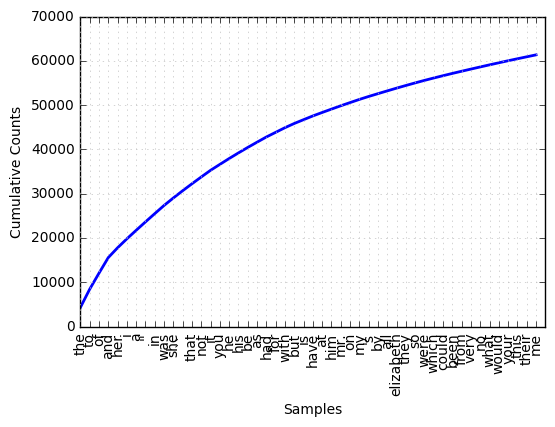

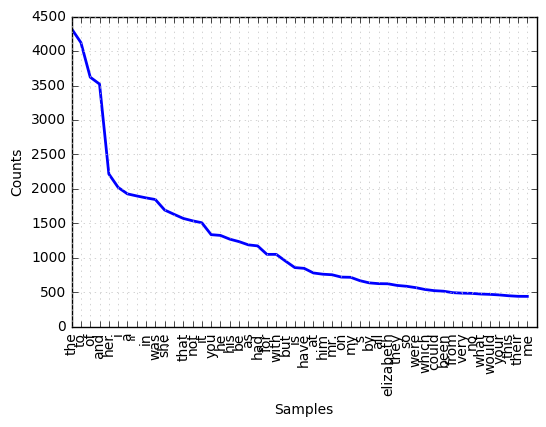

In [6]:
austen_word_frequency.plot(50, cumulative=True)
austen_word_frequency.plot(50, cumulative=False)

The most frequent words are, of course, the stop words. These words do not tell us much about the content of the text.

### 4. Count word frequencies after removing stop words

In [7]:
austen_list_clean_sw = [word for word in austen_list_clean if word not in stopwords.words('english')]
alcott_list_clean_sw = [word for word in alcott_list_clean if word not in stopwords.words('english')]

austen_word_frequency_sw = nltk.FreqDist(austen_list_clean_sw)
alcott_word_frequency_sw = nltk.FreqDist(alcott_list_clean_sw)

print("Frequent words in Pride and Prejudice")
print(austen_word_frequency_sw.most_common(20))
print()
print("Frequent words in A Garland for Girls")
print(alcott_word_frequency_sw.most_common(20))

Frequent words in Pride and Prejudice
[("''", 1897), ('``', 1631), ('mr.', 753), ("'s", 667), ('elizabeth', 622), ('could', 522), ('would', 468), ('darcy', 415), ('said', 398), ('mrs.', 340), ('much', 328), ('bennet', 323), ('must', 308), ('bingley', 302), ('one', 295), ('jane', 286), ('every', 283), ('miss', 281), ('know', 236), ('though', 222)]

Frequent words in A Garland for Girls
[('”', 523), ('little', 307), ('one', 302), ('said', 220), ('like', 196), ('old', 193), ('much', 171), ('--', 171), ('would', 165), ('see', 163), ('could', 161), ('miss', 155), ('good', 148), ('go', 139), ('girls', 136), ('work', 134), ('“i', 131), ('went', 130), ('know', 128), ('well', 128)]


### 5. Bonus 2: Concordances

The NLTK package has many built-in functions for natural language processing. I encourage you to explore the full range of techniques available. I'll go over two more here: concordance() and similar().

The concordance() function lists out every time the specified words appears in the text along with the surrounding context.

In [8]:
marx_string = open('../data/Marx_CommunistManifesto.txt', encoding='utf-8').read()
prince_string = open('../data/Machiavelli_ThePrince.txt', encoding='utf-8').read()

marx_list = word_tokenize(marx_string)
prince_list = word_tokenize(prince_string)

marx_nltk = nltk.Text(marx_list)
prince_nltk = nltk.Text(prince_list)
print(prince_nltk)
marx_nltk

<Text: THE PRINCE by Nicolo Machiavelli Translated by W....>


<Text: The Project Gutenberg EBook of The Communist Manifesto...>

In [9]:
marx_nltk.concordance('people')
prince_nltk.concordance('people')

Displaying 7 of 7 matches:
he ideas of its ruling class . When people speak of ideas that revolutionise s
aristocracy , in order to rally the people to them , waved the proletarian alm
bag in front for a banner . But the people , so often as it joined them , saw 
, to the ruling class . For how can people , when once they understand their s
 any way with an electronic work by people who agree to be bound by the terms 
ds of volunteers and donations from people in all walks of life . Volunteers a
any particular paper edition . Most people start at our Web site which has the
Displaying 25 of 116 matches:
etter to earn the confidence of the people than to rely on fortresses . This i
al force , capable of inspiring the people with a just recognition of the fund
 so to understand the nature of the people it needs to be a prince , and to un
at of princes it needs to be of the people . Take then , your Magnificence , t
ess the customs are alike , and the people will easily be able to get on a

The text.similar() method takes a word w, finds all contexts w1 w w2, then finds all words w' that appear in the same context, i.e. w1 w' w2

In [10]:
print("Marx")
marx_nltk.similar('people')
print()
print("Machiavelli")
prince_nltk.similar('people')

Marx
bourgeoisie right first manufacturer proletariat country german
landlord towns communists prelude rest century donors power

Machiavelli
prince state duke other enemy florentines soldiers church nobles
country romagna king second romans end city opportunity turk venetians
castle
